# Caching Strategies Exploration
15212-CourseWork-2 from Weicheng Ao

In [1]:
# Basic imports, including the matplotlib graphical library.
from cache import Memory, CyclicCache, LRUCache, RandomCache
import random
import matplotlib.pyplot as plt
import pandas as pd
cache_size = 4

## Experiments
We use a range of test cases in this main part, in order to show the performance and relationship between the different caching strategies under various conditions.

In [2]:
# We define the main test process here.
def process():
    global memcount,cycliccount,rdmcount,lrucount,results,cache_size
    mem = Memory()
    lru = LRUCache()
    cyclic = CyclicCache()
    rdm = RandomCache()

    lru.cache_size = cache_size
    rdm.cache_size = cache_size
    cyclic.cache_size = cache_size

    results = []
    for datum in test_data:
        mem.lookup(datum)
#     print("Memory memory Hits:", mem.get_hit_count())
    memcount = mem.get_hit_count()
    results.append(memcount)
    
    for datum in test_data:
        lru.lookup(datum)
#     print("LRU memory Hits:", lru.get_hit_count())
    lrucount = lru.get_hit_count()
    results.append(lrucount)

    for datum in test_data:
        cyclic.lookup(datum)
#     print("Cyclic memory Hits:", cyclic.get_hit_count())
    cycliccount = cyclic.get_hit_count()
    results.append(cycliccount)

    for datum in test_data:
        rdm.lookup(datum)
#     print("Random memory Hits:", rdm.get_hit_count())
    rdmcount = rdm.get_hit_count()
    results.append(rdmcount)

<h4>1. Basic Test Cases: Ordered/Unordered Data Points with no duplicate value contained (Every value in the Test Case is unique).</h4>

In [3]:
test_data = []
# Ordered Unique Data Generation, from 0 to 999.
print("Ordered Unique Data Generation")
for i in range(0,1000):
    test_data.append(i)
process()
df = pd.DataFrame(index=[i for i in range(1)], columns=['Memory Memory Hits','LRU Memory Hits','Cyclic Memory Hits','Random Memory Hits'])
for i in range(len(df)):
    df['Memory Memory Hits'][i]=memcount
    df['LRU Memory Hits'][i]=lrucount
    df['Cyclic Memory Hits'][i]=cycliccount
    df['Random Memory Hits'][i]=rdmcount
df

Ordered Unique Data Generation


,Memory Memory Hits,LRU Memory Hits,Cyclic Memory Hits,Random Memory Hits
0,1000,1000,1000,1000


In [4]:
# Unordered Unique Data Generation, from 0 to 999.
import random
random.shuffle(test_data)

print("Unordered Unique Data Generation")
process()
df = pd.DataFrame(index=[i for i in range(1)], columns=['Memory Memory Hits','LRU Memory Hits','Cyclic Memory Hits','Random Memory Hits'])
for i in range(len(df)):
    df['Memory Memory Hits'][i]=memcount
    df['LRU Memory Hits'][i]=lrucount
    df['Cyclic Memory Hits'][i]=cycliccount
    df['Random Memory Hits'][i]=rdmcount
df

Unordered Unique Data Generation


,Memory Memory Hits,LRU Memory Hits,Cyclic Memory Hits,Random Memory Hits
0,1000,1000,1000,1000


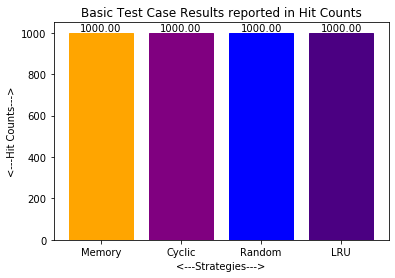

In [5]:
colours = ['orange','purple','blue','indigo','gray','green','black','pink']
# plt.figure(figsize=(19,5))
plt.xlabel('<---Strategies--->')
plt.ylabel('<---Hit Counts--->')
plt.title('Basic Test Case Results reported in Hit Counts')
bars = plt.bar(['Memory','Cyclic','Random','LRU'],[memcount,cycliccount,rdmcount,lrucount],label='Hit Counts')
for i in range(4):
    bars[i].set_color(colours[i])
for x,y in zip(['Memory','Cyclic','Random','LRU'],[memcount,cycliccount,rdmcount,lrucount]):
    plt.text(x,y,'%.2f' %y, ha='center',va='bottom')

In [6]:
# Generate Unique Test Data according to the cache size N.
# For example: If N=4, the number of the test data will be 4, and this
#will be repeated 100 times of the same test set of data.
# This time I assumed the cache_size of three implementations same.

mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()

print("Cache Size Assumed:", rdm.cache_size)
test_data = []
temp = lru.cache_size
for i in range(0, lru.cache_size):
    test_data.append(random.randint(temp-lru.cache_size, temp))
    temp = temp + lru.cache_size + 1
print("Unique Data Set Generated:",test_data,"*100")
for i in range(0, 100):
    for j in range(0,temp):
        test_data.append(test_data[j])

import random
random.shuffle(test_data)

process()
df = pd.DataFrame(index=[i for i in range(1)], columns=['Memory Memory Hits','LRU Memory Hits','Cyclic Memory Hits','Random Memory Hits'])
for i in range(len(df)):
    df['Memory Memory Hits'][i]=memcount
    df['LRU Memory Hits'][i]=lrucount
    df['Cyclic Memory Hits'][i]=cycliccount
    df['Random Memory Hits'][i]=rdmcount
df

Cache Size Assumed: 4
Unique Data Set Generated: [2, 8, 10, 16] *100


,Memory Memory Hits,LRU Memory Hits,Cyclic Memory Hits,Random Memory Hits
0,2404,4,4,4


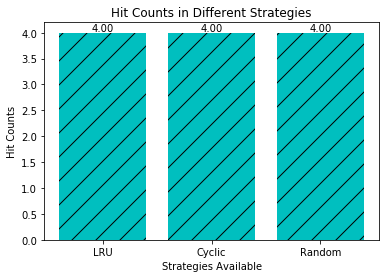

In [7]:
plt.title("Hit Counts in Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Strategies Available')
plt.bar(['LRU','Cyclic','Random'],[lrucount,cycliccount,rdmcount], label='Hit Counts',hatch="/",color="c")
for x,y in zip(['LRU','Cyclic','Random'],[lrucount,cycliccount,rdmcount]):
    plt.text(x,y,'%.2f' %y, ha='center',va='bottom')

<p>Case 1 -- Note:</p>
<p>For these Basic Test Cases above, we can see that they have the same times of memory accesses, this is because the data points are unique and the number of unique data points is not exceeds the cache size, so that every data needs to be cached at the first time encountered. Once the cached value is found, it needs not to access memory. Hence in these cases all three implementations behave in the same way.</p>

<h4>2. The number of unique data points is larger than the cache size.</h4>
<p>For example: if the cache size is 4, then the number of unique data points will be larger than 4.</p>

In [8]:
# Test Data Generation
# We generated 5 unique data points and appended these values 100 times to a list called test_data.
mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()
mem_results = []
lru_results = []
cyclic_results = []
rdm_results = []

# I used a range of the number of unique data points, in this case, from 5 to 14 unique values.
df = pd.DataFrame(index=[i for i in range(10)], columns=['Memory Memory Hits','LRU Memory Hits','Cyclic Memory Hits','Random Memory Hits','Number of unique data points','Data Set Generated'])
for k in range(1,11): 
    print("Cache Size Assumed:", rdm.cache_size)
    test_data = []
    temp = lru.cache_size
    for i in range(0, lru.cache_size + k):
        # This code snippet in this for loop is for generating unique values.
        test_data.append(random.randint(temp-lru.cache_size, temp))
        temp = temp + lru.cache_size + 1
    df['Data Set Generated'][k-1]=test_data
    print("Unique Data Set Generated:",test_data,"*100")
    for i in range(0, 100):
        for j in range(0,temp+k):
            test_data.append(test_data[j])
    process()
    df['Memory Memory Hits'][k-1]=memcount
    df['LRU Memory Hits'][k-1]=lrucount
    df['Cyclic Memory Hits'][k-1]=cycliccount
    df['Random Memory Hits'][k-1]=rdmcount

    df['Number of unique data points'][k-1]=lru.cache_size + k

    mem_results.append(results[0])
    lru_results.append(results[1])
    cyclic_results.append(results[2])
    rdm_results.append(results[3])
df

Cache Size Assumed: 4
Unique Data Set Generated: [2, 8, 10, 17, 21] *100
Cache Size Assumed: 4
Unique Data Set Generated: [0, 6, 14, 19, 22, 29] *100
Cache Size Assumed: 4
Unique Data Set Generated: [3, 6, 13, 15, 24, 28, 34] *100
Cache Size Assumed: 4
Unique Data Set Generated: [1, 7, 10, 16, 21, 29, 31, 35] *100
Cache Size Assumed: 4
Unique Data Set Generated: [1, 8, 12, 19, 23, 28, 34, 39, 44] *100
Cache Size Assumed: 4
Unique Data Set Generated: [2, 8, 12, 19, 24, 26, 33, 37, 40, 49] *100
Cache Size Assumed: 4
Unique Data Set Generated: [1, 7, 10, 15, 22, 29, 32, 35, 44, 47, 51] *100
Cache Size Assumed: 4
Unique Data Set Generated: [3, 9, 14, 16, 23, 27, 34, 36, 44, 48, 50, 59] *100
Cache Size Assumed: 4
Unique Data Set Generated: [2, 9, 14, 15, 21, 26, 33, 35, 42, 45, 54, 57, 62] *100
Cache Size Assumed: 4
Unique Data Set Generated: [2, 6, 12, 17, 21, 29, 34, 38, 42, 48, 51, 55, 63, 69] *100


,Memory Memory Hits,LRU Memory Hits,Cyclic Memory Hits,Random Memory Hits,Number of unique data points,Data Set Generated
0,3005,3005,3005,1213,5,"[2, 8, 10, 17, 21, 2, 8, 10, 17, 21, 2, 8, 10,..."
1,3606,3606,3606,2191,6,"[0, 6, 14, 19, 22, 29, 0, 6, 14, 19, 22, 29, 0..."
2,4207,4207,4207,3104,7,"[3, 6, 13, 15, 24, 28, 34, 3, 6, 13, 15, 24, 2..."
3,4808,4808,4808,3985,8,"[1, 7, 10, 16, 21, 29, 31, 35, 1, 7, 10, 16, 2..."
4,5409,5409,5409,4749,9,"[1, 8, 12, 19, 23, 28, 34, 39, 44, 1, 8, 12, 1..."
5,6010,6010,6010,5469,10,"[2, 8, 12, 19, 24, 26, 33, 37, 40, 49, 2, 8, 1..."
6,6611,6611,6611,6206,11,"[1, 7, 10, 15, 22, 29, 32, 35, 44, 47, 51, 1, ..."
7,7212,7212,7212,6881,12,"[3, 9, 14, 16, 23, 27, 34, 36, 44, 48, 50, 59,..."
8,7813,7813,7813,7524,13,"[2, 9, 14, 15, 21, 26, 33, 35, 42, 45, 54, 57,..."
9,8414,8414,8414,8210,14,"[2, 6, 12, 17, 21, 29, 34, 38, 42, 48, 51, 55,..."


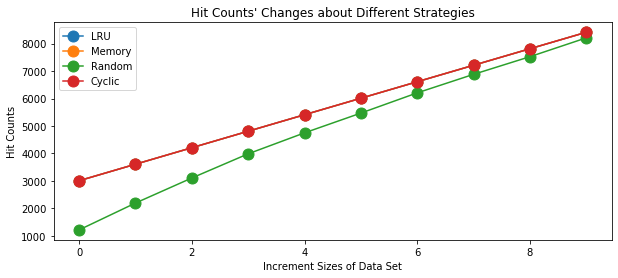

In [9]:
# Graphical Representation of these results above.
plt.figure('Trends', figsize=(10,4))
plt.title("Hit Counts' Changes about Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Increment in the Number of Unique Data Points (Originally 4)')
plt.plot(lru_results, label='LRU', marker='o',markersize='11')
plt.plot(mem_results, label='Memory', marker='o',markersize='11')
plt.plot(rdm_results, label='Random', marker='o',markersize='11')
plt.plot(cyclic_results, label='Cyclic', marker='o',markersize='11')
plt.legend(loc='upper left')

<p>Case 2 -- Note:</p>
<p>As you can see above, LRU and Cyclic strategies are performed in a same way, as each data point used is only once. For the LRU strategy, it needs to write to cache every time after the fifth value (in the case of the cache size is 4) encountered, but it loses the first value added which also needs an extra memory access if the next value is actually the last value just lost. For the Cyclic strategy, it will be the same as the next value encountered is the last value lost, that is bad in terms of memory accessing.</p>
<p>Interestingly, the Random strategy behaves very well in the first case, it only accessed the memory about one third (1/3) time of the other two strategies. I think this is because the order of value accessing which is random accessing, takes a big advantage and is not restricted to the accessing order.</p>
<p>However, when the unique data points becomes large, the advantage of the Random strategy is reduced sharply first and then gradually diminished as shown in the graph above, we can see that the difference between the green line(refers to the Random strategy) and the other lines, gradually decreases when the data set becomes large and finally no difference at all at some point. In other words, they are converged finally.</p>

<h4>3. New unique value added just after a cached value used (in LRU case, it is read.) and After this, the Data Points between the second and the new added value are repeated several times.</h4>
<p>For example: if the cache size is 4, then the data set is like [0,1,2,3,0,4,1,2,3,0,4,1,2,3,0,4,...] (the part of repetition is '1,2,3,0,4' in this case.) or more data points available, I mean that I intentionally repeat the cached value just before a new value comes, this means I want to explore the performances in case that LRU functionality is used, but I do not know the other two implementations yet.</p>

In [10]:
mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()
mem_results = []
lru_results = []
cyclic_results = []
rdm_results = []

# I used a range of the number of unique data points, in this case, from 5 to 14 repeated set of values.
print("Cache Size Selected:", rdm.cache_size)

df = pd.DataFrame(index=[i for i in range(10)], columns=['Memory Memory Hits','LRU Memory Hits','Cyclic Memory Hits','Random Memory Hits'])
for k in range(1,11):
    test_data = []
    for i in range(0,rdm.cache_size):
        test_data.append(i)
    test_data.append(test_data[0])
    test_data.append(i+1)
    for j in range(1,k):
        for i in range(1,rdm.cache_size+2):
            test_data.append(test_data[i])
    process()
    df['Memory Memory Hits'][k-1]=memcount
    df['LRU Memory Hits'][k-1]=lrucount
    df['Cyclic Memory Hits'][k-1]=cycliccount
    df['Random Memory Hits'][k-1]=rdmcount

    mem_results.append(results[0])
    lru_results.append(results[1])
    cyclic_results.append(results[2])
    rdm_results.append(results[3])
# print(test_data)
df

Cache Size Selected: 4


,Memory Memory Hits,LRU Memory Hits,Cyclic Memory Hits,Random Memory Hits
0,6,5,5,5
1,11,10,6,6
2,16,15,10,9
3,21,20,11,13
4,26,25,15,13
5,31,30,16,19
6,36,35,20,16
7,41,40,21,20
8,46,45,25,19
9,51,50,26,24


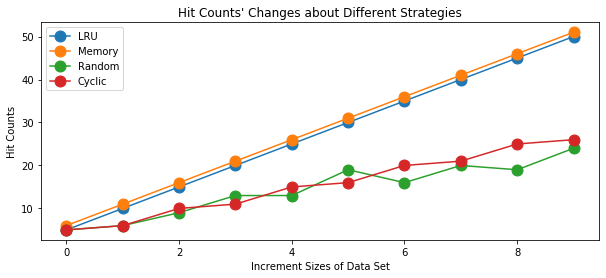

In [11]:
# Graphical Representation of these results above.
plt.figure('Trends', figsize=(10,4))
plt.title("Hit Counts' Changes about Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Increment Sizes of Data Set')
plt.plot(lru_results, label='LRU', marker='o',markersize='11')
plt.plot(mem_results, label='Memory', marker='o',markersize='11')
plt.plot(rdm_results, label='Random', marker='o',markersize='11')
plt.plot(cyclic_results, label='Cyclic', marker='o',markersize='11')
plt.legend(loc='upper left')

<p>Case 3 -- Note:</p>
<p>As you can see in the line graph above, the method 'New unique value added just after a cached value used' influences the behaviours of these strategies greatly. In this case, the Random and Cyclic strategies performed in a similar way but the LRU and Memory strategies behave in the similar way. The difference of the Memory Hit Counts becomes larger and larger and the LRU hit counts is approximately 2 times as large as the Cyclic and Random hit counts in any set of data points.</p>
<p>This is because the Cyclic strategy rewrites the cache in a cyclic way and not consider the least recently used value, this is particularly useful when the next value is in the cache and not thrown away as LRU strategy does(in this case LRU has to use an additional memory hit as it needs to look-up its address.).</p>
<p>Besides, I think the Random strategy is performed slightly better than the Cyclic strategy in terms of memory accessing, this might because the Random strategy accessed the memory in a random way, this is particularly useful when the data set is large and there are large data points repeated. And not restrict in an ordered way.</p>

<h4>4. All data points generated in a random way, in a random fashion, no human control applied. New data points are appended to the old large data set recursively. Note, in this case I also keep the cache size unaltered, it is 4 as usual.</h4>

In [12]:
# test_data = [1,2,3,1,5,1,6,7,8,1,9,2,3,1]
mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()
mem_results = []
lru_results = []
cyclic_results = []
rdm_results = []
test_data = []

# New data points are appended to the old large data set recursively.
# Note, in this case I also keep the cache size unaltered, it is 4 as usual.
df = pd.DataFrame(index=[i for i in range(10)], columns=['Memory Memory Hits','LRU Memory Hits','Cyclic Memory Hits','Random Memory Hits'])
for j in range(0,10):
    # New data points are appended to the old large data set recursively.
    for i in range(0,9999):
        # All data points generated in a random way, in a random fashion, no human control applied.
        test_data.append(random.randint(0, 6))
    process()
    df['Memory Memory Hits'][j]=memcount
    df['LRU Memory Hits'][j]=lrucount
    df['Cyclic Memory Hits'][j]=cycliccount
    df['Random Memory Hits'][j]=rdmcount

    mem_results.append(results[0])
    lru_results.append(results[1])
    cyclic_results.append(results[2])
    rdm_results.append(results[3])
df

,Memory Memory Hits,LRU Memory Hits,Cyclic Memory Hits,Random Memory Hits
0,9999,4270,4253,4305
1,19998,8561,8494,8552
2,29997,12882,12761,12857
3,39996,17133,17072,17006
4,49995,21485,21379,21264
5,59994,25849,25728,25643
6,69993,30132,29990,29835
7,79992,34373,34224,34280
8,89991,38655,38468,38591
9,99990,42846,42714,42919


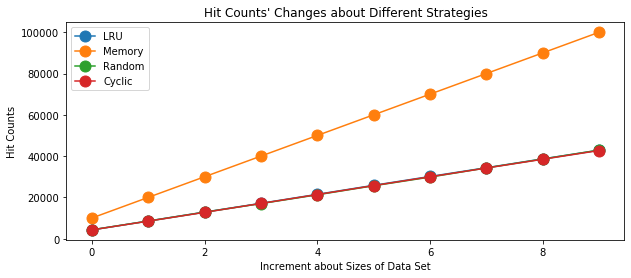

In [13]:
# Graphical Representation of these results above.
plt.figure('Trends', figsize=(10,4))
plt.title("Hit Counts' Changes about Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Increment about Sizes of Data Set')
plt.plot(lru_results, label='LRU', marker='o',markersize='11')
plt.plot(mem_results, label='Memory', marker='o',markersize='11')
plt.plot(rdm_results, label='Random', marker='o',markersize='11')
plt.plot(cyclic_results, label='Cyclic', marker='o',markersize='11')
plt.legend(loc='upper left')

<p>Case 4 -- Note:</p>
<p>In a generated random data pool, three main memory accessing strategies behave in a closed similar way, the memory strategy(no strategy at all), indicates the total number of data points in this data set. We can see that all three main strategies have their own ways in reducing the memory accesses, so no strategy surpass the other ones as we see in the graph above. But their performances have little difference in terms of memory accessing as you may notice that three lines coincide each other. The line graph just below is a simplified version of the above diagram which only consists of LRU, Random and Cyclic strategies.</p>

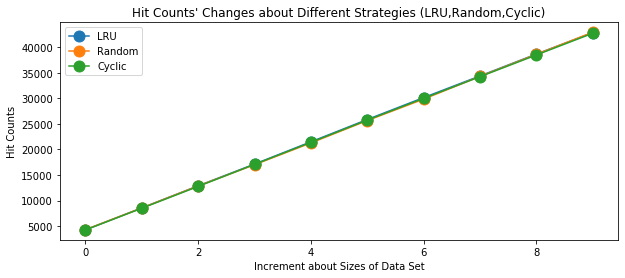

In [14]:
plt.figure('Trends', figsize=(10,4))
plt.title("Hit Counts' Changes about Different Strategies (LRU,Random,Cyclic)")
plt.ylabel('Hit Counts')
plt.xlabel('Increment about Sizes of Data Set')
plt.plot(lru_results, label='LRU', marker='o',markersize='11')
plt.plot(rdm_results, label='Random', marker='o',markersize='11')
plt.plot(cyclic_results, label='Cyclic', marker='o',markersize='11')
plt.legend(loc='upper left')

<h4>5. Changed the Cache Size and all data points generated in a random way, in a random fashion. As opposed to the Case 4 above which the Cache Size is fixed to four.</h4>

In [19]:
mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()
mem_results = []
lru_results = []
cyclic_results = []
rdm_results = []
test_data = []


for i in range(0,9999):
    # All data points generated in a random way, in a random fashion, no human control applied.
    test_data.append(random.randint(0, 9999))

df = pd.DataFrame(index=[i for i in range(10)], columns=['Cache Size','Memory Memory Hits','LRU Memory Hits','Cyclic Memory Hits','Random Memory Hits'])
# New data points are appended to the old large data set recursively.
for j in range(0,10):
    # New data points are appended to the old large data set recursively.
    cache_size=4+j
    process()
    df['Memory Memory Hits'][j]=memcount
    df['LRU Memory Hits'][j]=lrucount
    df['Cyclic Memory Hits'][j]=cycliccount
    df['Random Memory Hits'][j]=rdmcount
    df['Cache Size'][j]=cache_size

    mem_results.append(results[0])
    lru_results.append(results[1])
    cyclic_results.append(results[2])
    rdm_results.append(results[3])
print("Constant: The Data Set used is the same thoughout this experiment. Variable: the Cache Size.")
df
# Note, in this case I increment the cache size by one each time, from 4 onwards.

Constant: The Data Set used is the same thoughout this experiment. Variable: the Cache Size.


,Cache Size,Memory Memory Hits,LRU Memory Hits,Cyclic Memory Hits,Random Memory Hits
0,4,9999,9993,9993,9994
1,5,9999,9993,9993,9993
2,6,9999,9992,9993,9990
3,7,9999,9990,9993,9990
4,8,9999,9990,9993,9988
5,9,9999,9989,9993,9986
6,10,9999,9987,9993,9987
7,11,9999,9985,9993,9988
8,12,9999,9985,9993,9985
9,13,9999,9985,9993,9987


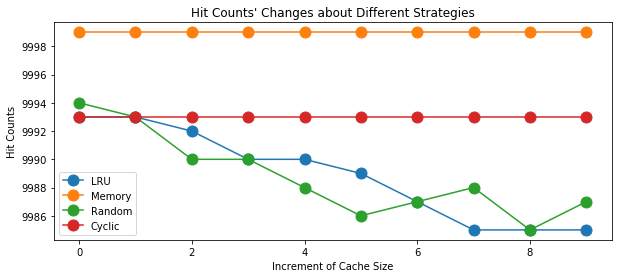

In [20]:
# Graphical Representation of these results above.
plt.figure('Trends', figsize=(10,4))
plt.title("Hit Counts' Changes about Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Increment of Cache Size')
plt.plot(lru_results, label='LRU', marker='o',markersize='11')
plt.plot(mem_results, label='Memory', marker='o',markersize='11')
plt.plot(rdm_results, label='Random', marker='o',markersize='11')
plt.plot(cyclic_results, label='Cyclic', marker='o',markersize='11')
plt.legend(loc='lower left')

<p>Case 5 -- Note:</p>
<p>In this case (case 5), I adjusted the cache size from 4 to 13 and generated the line trending graph above. And keep the data set unchanged once it has generated, but the possible number of the unique values is set to 9999, which means the data is much more diverse than case four (case 4) where I set this value to 6.</p>
<p>Some general remarks, all three main strategies have an impact in reducing the memory accessing by using a cache but it is quite small, the Cyclic strategy has a constant performance throughout this data set model. The other two, Random and LRU, they have a better performance once the cache size increased, but the effect is quite small as it only reduces the hit counts by a small amount, this is shown in the graph above.</p>

## Conclusions

To sum up, LRU, Cyclic and Random strategies all have their own logic to reduce the memory accesses and the way to store values in their cache. According to the experiments conducted above, when all the values in a dataset are unique and the number of values is not exceeds the cache size, these strategies are all performed in the same way, the memory access is the number of unique values in the dataset.